In [1]:
import pandas as pd
import pyranges as pr

# Load data
cpgs = pd.read_csv('cpgs_within_hypo_regions.csv', sep=',')
cpgs.drop(columns=["Start_b", "End_b"], inplace=True)
print(cpgs.columns)

Index(['Chromosome', 'Start', 'End', 'Naive_1_frac', 'Naive_1_cov',
       'Formative_1_frac', 'Formative_1_cov', 'Primed_1_frac', 'Primed_1_cov',
       'Formative_Neuron_1_frac', 'Formative_Neuron_1_cov',
       'Primed_Neuron_1_frac', 'Primed_Neuron_1_cov', 'Naive_2_frac',
       'Naive_2_cov', 'Formative_2_frac', 'Formative_2_cov', 'Primed_2_frac',
       'Primed_2_cov', 'Formative_Neuron_2_frac', 'Formative_Neuron_2_cov',
       'Primed_Neuron_2_frac', 'Primed_Neuron_2_cov'],
      dtype='object')


In [2]:
irs = pd.read_csv("hypomethylated_genes.bed", sep="\t", header=None, names=['Chr', 'Start', 'End'])
print(irs.columns)

Index(['Chr', 'Start', 'End'], dtype='object')


In [3]:
# Rename if needed
cpgs.rename(columns={'Chr': 'Chromosome'}, inplace=True)

    # Rename if needed
if 'Chromosome' not in irs.columns:
    irs.rename(columns={'Chr': 'Chromosome'}, inplace=True)

In [4]:
print(cpgs.columns)
print(irs.columns)

Index(['Chromosome', 'Start', 'End', 'Naive_1_frac', 'Naive_1_cov',
       'Formative_1_frac', 'Formative_1_cov', 'Primed_1_frac', 'Primed_1_cov',
       'Formative_Neuron_1_frac', 'Formative_Neuron_1_cov',
       'Primed_Neuron_1_frac', 'Primed_Neuron_1_cov', 'Naive_2_frac',
       'Naive_2_cov', 'Formative_2_frac', 'Formative_2_cov', 'Primed_2_frac',
       'Primed_2_cov', 'Formative_Neuron_2_frac', 'Formative_Neuron_2_cov',
       'Primed_Neuron_2_frac', 'Primed_Neuron_2_cov'],
      dtype='object')
Index(['Chromosome', 'Start', 'End'], dtype='object')


In [5]:
# Ensure chromosome column is string for both
cpgs['Chromosome'] = cpgs['Chromosome'].astype(str)
irs['Chromosome'] = irs['Chromosome'].astype(str)
irs['Chromosome'] = 'chr' + irs['Chromosome'].astype(str)

In [6]:
print(cpgs.columns)
print(irs.columns)

Index(['Chromosome', 'Start', 'End', 'Naive_1_frac', 'Naive_1_cov',
       'Formative_1_frac', 'Formative_1_cov', 'Primed_1_frac', 'Primed_1_cov',
       'Formative_Neuron_1_frac', 'Formative_Neuron_1_cov',
       'Primed_Neuron_1_frac', 'Primed_Neuron_1_cov', 'Naive_2_frac',
       'Naive_2_cov', 'Formative_2_frac', 'Formative_2_cov', 'Primed_2_frac',
       'Primed_2_cov', 'Formative_Neuron_2_frac', 'Formative_Neuron_2_cov',
       'Primed_Neuron_2_frac', 'Primed_Neuron_2_cov'],
      dtype='object')
Index(['Chromosome', 'Start', 'End'], dtype='object')


In [7]:
# Remove duplicate 'chr' prefix in 'Chr' column, if present
irs['Chromosome'] = irs['Chromosome'].str.replace(r'^(chr)+', 'chr', regex=True)

# Now rebuild 'Hypo_ID' column correctly
irs['Hypo_ID'] = irs['Chromosome'] + ':' + irs['Start'].astype(str) + '-' + irs['End'].astype(str)

# Check result
print(irs.head())

  Chromosome    Start      End               Hypo_ID
0       chr1   826206   827422    chr1:826206-827422
1       chr1   998962  1000072   chr1:998962-1000072
2       chr1  1373730  1375338  chr1:1373730-1375338
3       chr1  2528745  2530145  chr1:2528745-2530145
4       chr1  2554724  2556911  chr1:2554724-2556911


In [8]:
# Drop columns ending in '_cov' since we filtered in previous script
cov_cols = [col for col in cpgs.columns if col.endswith('_cov')]
cpgs = cpgs.drop(columns=cov_cols)

In [9]:
# Define groups of columns to average
sample_groups = {
    'Naive_frac': ['Naive_1_frac', 'Naive_2_frac'],
    'Formative_frac': ['Formative_1_frac', 'Formative_2_frac'],
    'Primed_frac': ['Primed_1_frac', 'Primed_2_frac'],
    'Formative_Neuron_frac': ['Formative_Neuron_1_frac', 'Formative_Neuron_2_frac'],
    'Primed_Neuron_frac': ['Primed_Neuron_1_frac', 'Primed_Neuron_2_frac']
}

# Calculate row-wise mean for each group
for new_col, cols_to_avg in sample_groups.items():
    cpgs[new_col] = cpgs[cols_to_avg].mean(axis=1, skipna=True)

# Optionally: Drop the original replicate columns
cpgs = cpgs.drop(columns=[col for cols in sample_groups.values() for col in cols])

In [10]:
print(cpgs.head(10))

  Chromosome   Start     End  Naive_frac  Formative_frac  Primed_frac  \
0       chr1  826224  826226      0.0625          0.6915       0.8585   
1       chr1  826732  826734      0.0000          0.0715       0.0000   
2       chr1  826794  826796      0.0265          0.0835       0.0715   
3       chr1  826798  826800      0.0000          0.0000       0.0000   
4       chr1  826851  826853      0.0000          0.0000       0.0000   
5       chr1  826863  826865      0.0000          0.0000       0.0000   
6       chr1  827229  827231      0.0000          0.0000       0.0000   
7       chr1  827233  827235      0.0000          0.0000       0.0000   
8       chr1  827347  827349      0.0455          0.0000       0.0000   
9       chr1  827357  827359      0.0000          0.0000       0.0000   

   Formative_Neuron_frac  Primed_Neuron_frac  
0                   0.68              0.9005  
1                   0.00              0.0000  
2                   0.00              0.0000  
3       

In [11]:
import pyranges as pr

# Create PyRanges objects
gr_cpgs = pr.PyRanges(cpgs[['Chromosome', 'Start', 'End']])
gr_irs = pr.PyRanges(irs[['Chromosome', 'Start', 'End', 'Hypo_ID']])  # include Hypo_ID here

# Find overlaps and keep Hypo_ID from irs
joined = gr_cpgs.join(gr_irs)

# joined.df now contains cpgs coords + irs coords + Hypo_ID from irs
df_joined = joined.df

# Rename columns if needed (because join duplicates 'Start' and 'End' columns)
# Usually Pyranges appends _b to the irs columns, so Hypo_ID will be there without _b
print(df_joined.columns)

# Select relevant columns from joined output
# Keep Chromosome, Start, End from cpgs (no _b suffix)
# And Hypo_ID from irs
final_df = df_joined[['Chromosome', 'Start', 'End', 'Hypo_ID']].copy()

# If you want, merge back to original cpgs to get all cpgs columns + Hypo_ID
cpgs_with_Hypo_ID = cpgs.merge(final_df, on=['Chromosome', 'Start', 'End'], how='inner')

# Save or inspect
print(cpgs_with_Hypo_ID.head())
cpgs_with_Hypo_ID.to_csv('cpgs_with_Hypo_ID.csv', sep=',', index=False)

Index(['Chromosome', 'Start', 'End', 'Start_b', 'End_b', 'Hypo_ID'], dtype='object')
  Chromosome   Start     End  Naive_frac  Formative_frac  Primed_frac  \
0       chr1  826224  826226      0.0625          0.6915       0.8585   
1       chr1  826732  826734      0.0000          0.0715       0.0000   
2       chr1  826794  826796      0.0265          0.0835       0.0715   
3       chr1  826798  826800      0.0000          0.0000       0.0000   
4       chr1  826851  826853      0.0000          0.0000       0.0000   

   Formative_Neuron_frac  Primed_Neuron_frac             Hypo_ID  
0                   0.68              0.9005  chr1:826206-827422  
1                   0.00              0.0000  chr1:826206-827422  
2                   0.00              0.0000  chr1:826206-827422  
3                   0.00              0.0000  chr1:826206-827422  
4                   0.00              0.0000  chr1:826206-827422  


In [12]:
len(cpgs_with_Hypo_ID)

141394

/tmp/ipykernel_2804038/1813434620.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_long, x='Sample', y='Methylation', palette='pastel', cut=0, inner='box')


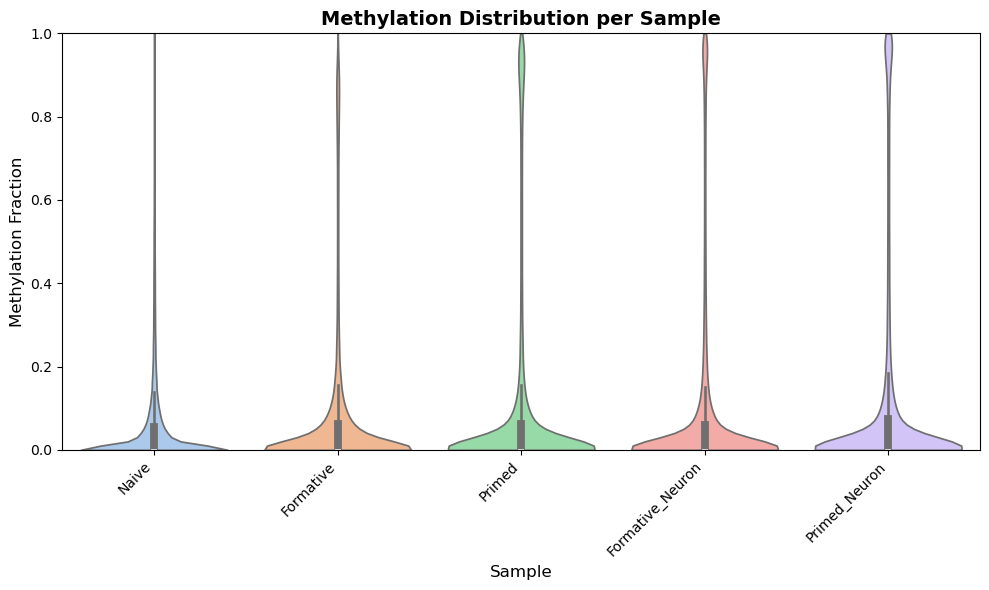

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

#ensure meth frac distribution is what i expect

# === Load data ===
df = pd.read_csv("cpgs_with_Hypo_ID.csv", sep=",")

# === Select methylation fraction columns ===
frac_cols = [col for col in df.columns if col.endswith('_frac')]

# === Melt dataframe to long format ===
df_long = df.melt(
    value_vars=frac_cols,
    var_name='Sample',
    value_name='Methylation'
)

# Drop missing values
df_long = df_long.dropna(subset=['Methylation'])

# Clean sample names (optional: remove "_frac" suffix)
df_long['Sample'] = df_long['Sample'].str.replace('_frac', '', regex=False)

# === Plot ===
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_long, x='Sample', y='Methylation', palette='pastel', cut=0, inner='box')

plt.title('Methylation Distribution per Sample', fontsize=14, weight='bold')
plt.xlabel('Sample', fontsize=12)
plt.ylabel('Methylation Fraction', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()

# === Save ===
plt.savefig("methylation_violinplot_hypo.pdf", format='pdf', bbox_inches='tight')
plt.savefig("methylation_violinplot_hypo.svg", format='svg', bbox_inches='tight')
plt.show()